<a href="https://colab.research.google.com/github/linaambn/vegetable-classification/blob/main/Uap_Vegetable_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q tensorflow
!pip install -q matplotlib seaborn scikit-learn pillow

In [ ]:
from google.colab import files
import zipfile

print("Upload file dataset ZIP...")
uploaded = files.upload()

# Extract dataset
for filename in uploaded.keys():
    print(f"Extracting {filename}...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')

print("✓ Dataset extracted to /content/dataset")

Upload file dataset ZIP...


Saving dataset_uap.zip to dataset_uap.zip
Extracting dataset_uap.zip...
✓ Dataset extracted to /content/dataset


In [ ]:
DATASET_DIR = "/content/dataset/Fruits_Vegetables_Dataset(12000)/Vegetables"

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio(
    DATASET_DIR,
    output="dataset_split",
    seed=42,
    ratio=(0.7, 0.15, 0.15)
)

Copying files: 6003 files [00:01, 3973.91 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as res_preprocess
import json

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

TRAIN_DIR = "dataset_split/train"
VAL_DIR   = "dataset_split/val"
TEST_DIR  = "dataset_split/test"

cnn_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

cnn_val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen_cnn = cnn_train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen_cnn = cnn_val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen_cnn = cnn_val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

eff_train_datagen = ImageDataGenerator(
    preprocessing_function=eff_preprocess,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

eff_val_test_datagen = ImageDataGenerator(
    preprocessing_function=eff_preprocess
)

train_gen_eff = eff_train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen_eff = eff_val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen_eff = eff_val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

pre_train_datagen = ImageDataGenerator(
    preprocessing_function=mob_preprocess,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

pre_val_test_datagen = ImageDataGenerator(
    preprocessing_function=mob_preprocess
)

train_gen_pre = pre_train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen_pre = pre_val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen_pre = pre_val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

with open("class_indices.json", "w") as f:
    json.dump(train_gen_cnn.class_indices, f)

print("✅ Dataset siap digunakan untuk CNN, EfficientNet, dan MobileNet/ResNet")


Found 4193 images belonging to 10 classes.
Found 896 images belonging to 10 classes.
Found 909 images belonging to 10 classes.
Found 4193 images belonging to 10 classes.
Found 896 images belonging to 10 classes.
Found 909 images belonging to 10 classes.
Found 4193 images belonging to 10 classes.
Found 896 images belonging to 10 classes.
Found 909 images belonging to 10 classes.
✅ Dataset siap digunakan untuk CNN, EfficientNet, dan MobileNet/ResNet


**MODEL 1 — CNN BASE (Non-Pretrained)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

cnn_base = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(train_gen_cnn.num_classes, activation="softmax")
])
cnn_base.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn = cnn_base.fit(
    train_gen_cnn,
    validation_data=val_gen_cnn,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  4/132 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - accuracy: 0.1159 - loss: 5.8891

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 539ms/step - accuracy: 0.2252 - loss: 2.6009 - val_accuracy: 0.5413 - val_loss: 1.3015
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 67s 507ms/step - accuracy: 0.5256 - loss: 1.3378 - val_accuracy: 0.6440 - val_loss: 0.9965
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 68s 510ms/step - accuracy: 0.6185 - loss: 1.1325 - val_accuracy: 0.7143 - val_loss: 0.8166
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 67s 503ms/step - accuracy: 0.6190 - loss: 1.0680 - val_accuracy: 0.7143 - val_loss: 0.8203
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 67s 508ms/step - accuracy: 0.6706 - loss: 0.9512 - val_accuracy: 0.7634 - val_loss: 0.7028
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 501ms/step - accuracy: 0.7232 - loss: 0.7950 - val_accuracy: 0.7578 - val_loss: 0.6929
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 496ms/step - accuracy: 0.7308 - loss: 0.7870 - val_accuracy: 0.7790 - val_loss: 0.6331
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 494ms/step - accuracy: 0.7385 - loss: 0.7583 - val

**MODEL 2 — MobileNetV2 (Pretrained)**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_gen_pre.num_classes, activation="softmax")(x)

mobilenet = tf.keras.Model(inputs=base_model.input, outputs=output)

mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_mobilenet = mobilenet.fit(
    train_gen_pre,
    validation_data=val_gen_pre,
    epochs=20
)


Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 612ms/step - accuracy: 0.7084 - loss: 0.9092 - val_accuracy: 0.8783 - val_loss: 0.3112
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 474ms/step - accuracy: 0.9361 - loss: 0.1888 - val_accuracy: 0.9141 - val_loss: 0.2564
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 477ms/step - accuracy: 0.9463 - loss: 0.1466 - val_accuracy: 0.9319 - val_loss: 0.2090
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 478ms/step - accuracy: 0.9674 - loss: 0.1020 - val_accuracy: 0.9219 - val_loss: 0.2532
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.9683 - loss: 0.0978 - val_accuracy: 0.9241 - val_loss: 0.2371
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 478ms/step - accuracy: 0.9768 - loss: 0.0750 - val_accuracy: 0.9275 - val_loss: 0.2297
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 476ms/step - accuracy: 0.9803 - loss: 0.0560 - val_accuracy: 0.9196 - val_loss: 0.2324
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 480ms/step - accuracy: 0.9769 - loss: 0

**MODEL 3 — EfficienNet (Pretrained)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# ===== BUILD MODEL =====
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_gen_eff.num_classes, activation="softmax")(x)

effnet = Model(inputs=base_model.input, outputs=output)

# ===== STAGE 1 : FEATURE EXTRACTION =====
base_model.trainable = False

effnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("🔹 Training Stage 1 (Feature Extraction)")
history_stage1 = effnet.fit(
    train_gen_eff,
    validation_data=val_gen_eff,
    epochs=15
)

# ===== STAGE 2 : FINE-TUNING =====
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

effnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("🔹 Training Stage 2 (Fine-Tuning)")
history_stage2 = effnet.fit(
    train_gen_eff,
    validation_data=val_gen_eff,
    epochs=10
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
🔹 Training Stage 1 (Feature Extraction)
Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 106s 621ms/step - accuracy: 0.7030 - loss: 0.8804 - val_accuracy: 0.9129 - val_loss: 0.2484
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 496ms/step - accuracy: 0.9143 - loss: 0.2401 - val_accuracy: 0.9174 - val_loss: 0.2407
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 63s 480ms/step - accuracy: 0.9399 - loss: 0.1742 - val_accuracy: 0.9431 - val_loss: 0.1848
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.9495 - loss: 0.1463 - val_accuracy: 0.9353 - val_loss: 0.1774
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 484ms/step - accuracy: 0.9580 - loss: 0.1214 - val_accuracy: 0.9453 - val_loss: 0.1673
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.9613 - loss: 0.1035 - val_accuracy: 0.9408 - val_loss: 0.1830
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 489ms/step - accuracy: 0.9728 - loss: 0.0910 - val_accuracy: 0.9453 - val_loss

In [ ]:
history_cnn = cnn_base.fit(
    train_gen_cnn,
    validation_data=val_gen_cnn,
    epochs=10
)

history_mobilenet = mobilenet.fit(
    train_gen_pre,
    validation_data=val_gen_pre,
    epochs=10
)

history_eff = effnet.fit(
    train_gen_eff,
    validation_data=val_gen_eff,
    epochs=10
)


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 504ms/step - accuracy: 0.8724 - loss: 0.3418 - val_accuracy: 0.8616 - val_loss: 0.4992
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 499ms/step - accuracy: 0.8824 - loss: 0.3267 - val_accuracy: 0.8772 - val_loss: 0.4845
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 502ms/step - accuracy: 0.8825 - loss: 0.3239 - val_accuracy: 0.8304 - val_loss: 0.5833
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 496ms/step - accuracy: 0.8579 - loss: 0.4253 - val_accuracy: 0.8516 - val_loss: 0.5077
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 492ms/step - accuracy: 0.8919 - loss: 0.3214 - val_accuracy: 0.8471 - val_loss: 0.5142
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 498ms/step - accuracy: 0.8861 - loss: 0.3204 - val_accuracy: 0.8504 - val_loss: 0.5440
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 491ms/step - accuracy: 0.8916 - loss: 0.3023 - val_accuracy: 0.8337 - val_loss: 0.6121
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 492ms/step - accuracy: 0.8759 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

def save_history_plot(history, model_name, filename):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title(f"Accuracy - {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(f"Loss - {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"model_artifacts/{filename}")
    plt.close()


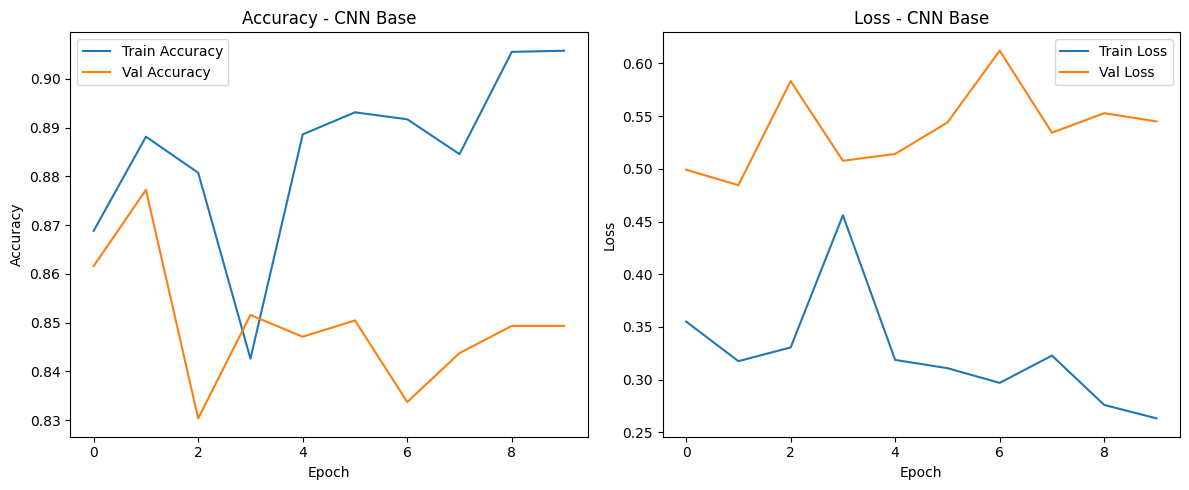

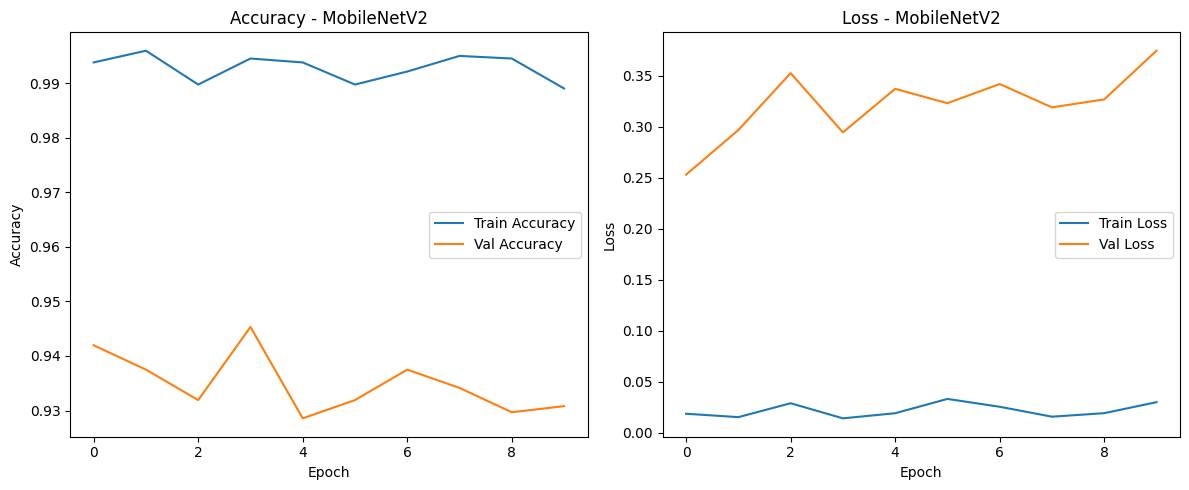

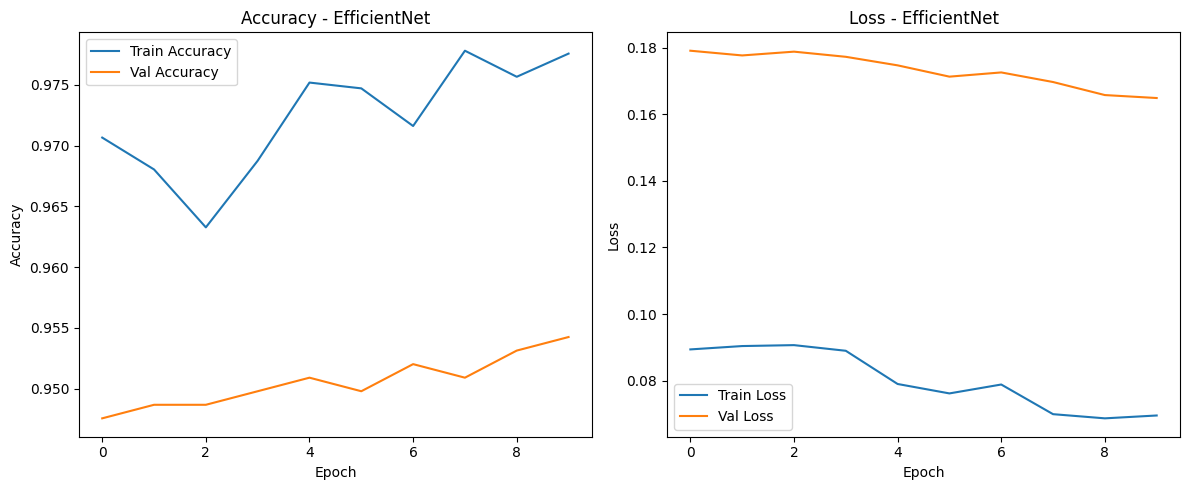

In [ ]:
plot_history(history_cnn, "CNN Base")
plot_history(history_mobilenet, "MobileNetV2")
plot_history(history_eff, "EfficientNet")


In [ ]:
save_history_plot(history_cnn, "CNN Base", "CNN_Base_history.png")
save_history_plot(history_mobilenet, "MobileNetV2", "MobileNetV2_history.png")
save_history_plot(history_eff, "EfficientNet", "EfficientNet_history.png")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, test_gen, model_name):
    print(f"\n================ {model_name} =================")

    # Reset generator
    test_gen.reset()

    # Evaluasi loss & accuracy
    loss, acc = model.evaluate(test_gen, verbose=0)
    print(f"Test Accuracy : {acc:.4f}")
    print(f"Test Loss     : {loss:.4f}")

    # Prediksi
    y_pred = model.predict(test_gen, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_gen.classes

    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(
        y_true,
        y_pred_classes,
        target_names=list(test_gen.class_indices.keys())
    ))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=test_gen.class_indices.keys(),
        yticklabels=test_gen.class_indices.keys()
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



================ CNN Base (Non-Pretrained) =================


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Accuracy : 0.8361
Test Loss     : 0.5557

📊 Classification Report:
                  precision    recall  f1-score   support

 FreshBellpepper       0.92      0.85      0.88        93
     FreshCarrot       0.81      0.95      0.88        93
   FreshCucumber       0.93      0.91      0.92        92
     FreshPotato       0.92      0.82      0.86        93
     FreshTomato       0.99      0.79      0.88        92
RottenBellpepper       0.64      0.77      0.70        90
    RottenCarrot       0.75      0.70      0.73        87
  RottenCucumber       0.90      0.77      0.83        90
    RottenPotato       0.72      0.91      0.80        89
    RottenTomato       0.89      0.89      0.89        90

        accuracy                           0.84       909
       macro avg       0.85      0.84      0.84       909
    weighted avg       0.85      0.84      0.84       909



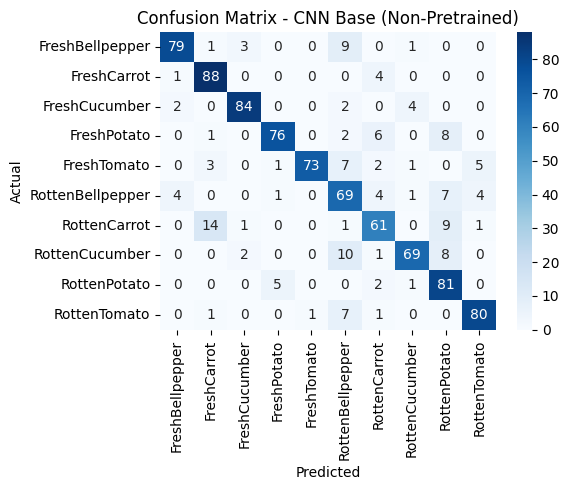


================ MobileNetV2 (Transfer Learning) =================


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Accuracy : 0.9384
Test Loss     : 0.3618

📊 Classification Report:
                  precision    recall  f1-score   support

 FreshBellpepper       0.98      0.95      0.96        93
     FreshCarrot       0.99      0.98      0.98        93
   FreshCucumber       0.97      0.95      0.96        92
     FreshPotato       0.98      0.88      0.93        93
     FreshTomato       1.00      0.99      0.99        92
RottenBellpepper       0.92      0.80      0.86        90
    RottenCarrot       0.88      0.94      0.91        87
  RottenCucumber       0.90      0.94      0.92        90
    RottenPotato       0.81      0.97      0.88        89
    RottenTomato       0.98      0.99      0.98        90

        accuracy                           0.94       909
       macro avg       0.94      0.94      0.94       909
    weighted avg       0.94      0.94      0.94       909



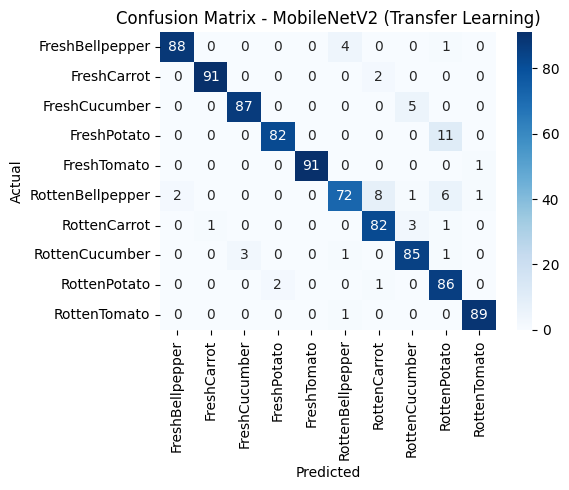


================ EfficientNet (Transfer Learning) =================


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Accuracy : 0.9527
Test Loss     : 0.1501

📊 Classification Report:
                  precision    recall  f1-score   support

 FreshBellpepper       0.97      0.94      0.95        93
     FreshCarrot       0.99      0.96      0.97        93
   FreshCucumber       0.96      1.00      0.98        92
     FreshPotato       0.95      0.96      0.95        93
     FreshTomato       0.99      0.99      0.99        92
RottenBellpepper       0.91      0.88      0.89        90
    RottenCarrot       0.93      0.95      0.94        87
  RottenCucumber       0.95      0.93      0.94        90
    RottenPotato       0.91      0.93      0.92        89
    RottenTomato       0.97      0.99      0.98        90

        accuracy                           0.95       909
       macro avg       0.95      0.95      0.95       909
    weighted avg       0.95      0.95      0.95       909



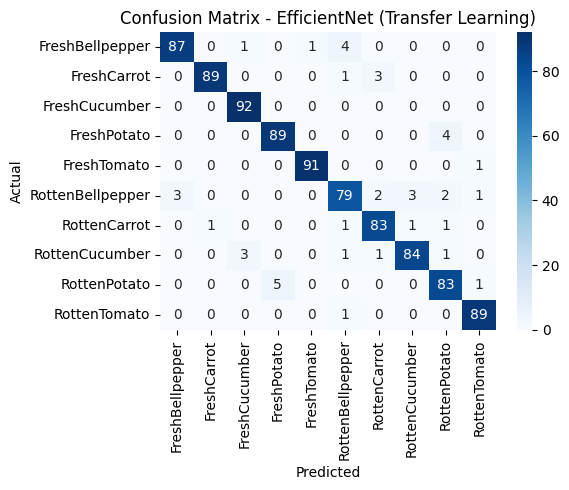

In [ ]:
evaluate_model(cnn_base, test_gen_cnn, "CNN Base (Non-Pretrained)")
evaluate_model(mobilenet, test_gen_pre, "MobileNetV2 (Transfer Learning)")
evaluate_model(effnet, test_gen_eff, "EfficientNet (Transfer Learning)")


In [ ]:
import os

ARTIFACT_DIR = "model_artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

print("💾 Menyimpan model...")

cnn_base.save(f"{ARTIFACT_DIR}/cnn_base.keras")
print("✔ cnn_base.keras tersimpan")

mobilenet.save(f"{ARTIFACT_DIR}/mobilenet.keras")
print("✔ mobilenet.keras tersimpan")

effnet.save(f"{ARTIFACT_DIR}/efficientnet.keras")
print("✔ efficientnet.keras tersimpan")

print("\n🎉 SEMUA MODEL BERHASIL DISIMPAN!")


💾 Menyimpan model...
✔ cnn_base.keras tersimpan
✔ mobilenet.keras tersimpan
✔ efficientnet.keras tersimpan

🎉 SEMUA MODEL BERHASIL DISIMPAN!


In [ ]:
import os
import zipfile

zip_name = "model_artifacts.zip"

with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for foldername, subfolders, filenames in os.walk("model_artifacts"):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zipf.write(
                file_path,
                arcname=os.path.relpath(file_path, "model_artifacts")
            )

print("✅ ZIP model_artifacts.zip berhasil dibuat")


✅ ZIP model_artifacts.zip berhasil dibuat


In [ ]:
from google.colab import files
files.download("model_artifacts.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>